##installing required modules 

In [1]:
!pip install easyocr
!pip3 install torch torchvision torchaudio
!pip install opencv-python
!pip install matplotlib
!pip install imutils

  Using cached easyocr-1.7.1-py3-none-any.whl.metadata (11 kB)
  Using cached torch-2.1.1-cp310-cp310-win_amd64.whl.metadata (26 kB)
  Using cached torchvision-0.16.1-cp310-cp310-win_amd64.whl.metadata (6.6 kB)
  Using cached opencv_python_headless-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached scipy-1.11.4-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached numpy-1.26.2-cp310-cp310-win_amd64.whl.metadata (61 kB)
  Using cached Pillow-10.1.0-cp310-cp310-win_amd64.whl.metadata (9.6 kB)
  Using cached scikit_image-0.22.0-cp310-cp310-win_amd64.whl.metadata (13 kB)
  Using cached python_bidi-0.4.2-py2.py3-none-any.whl (30 kB)
  Using cached shapely-2.0.2-cp310-cp310-win_amd64.whl.metadata (7.2 kB)
  Using cached pyclipper-1.3.0.post5-cp310-cp310-win_amd64.whl.metadata (9.2 kB)
  Using cached ninja-1.11.1.1-py2.py3-none-win_amd64.whl.metadata (5.4 kB)
  Using cached filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)

In [10]:
import numpy as np

In [2]:
import easyocr as esr
import cv2
import matplotlib.pyplot as plt
import imutils

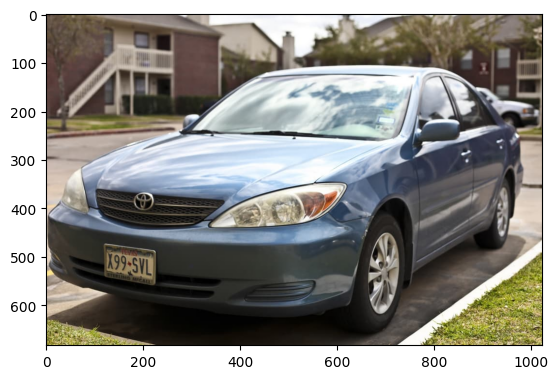

In [19]:
img = cv2.imread('./data/car2.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

we convert image to gray because thats how computer vision processes image .

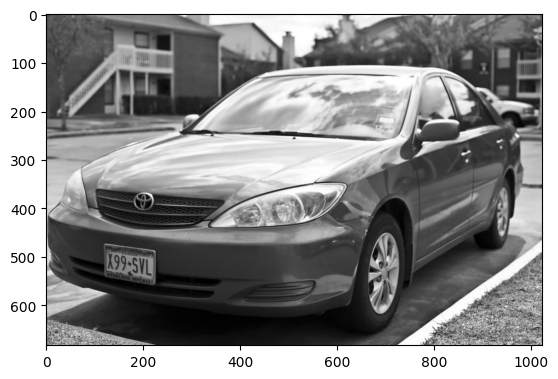

In [3]:
img = cv2.imread('./data/car2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

here we apply bilateralfilter for marking of outlines

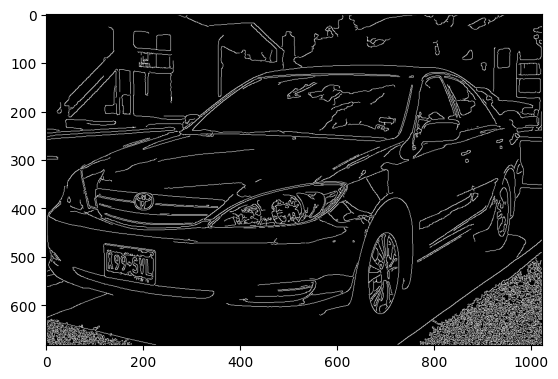

In [4]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

here we find sharp points link rectangles

In [5]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [6]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [7]:
location

array([[[119, 475]],

       [[224, 488]],

       [[224, 557]],

       [[123, 542]]], dtype=int32)

In [11]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

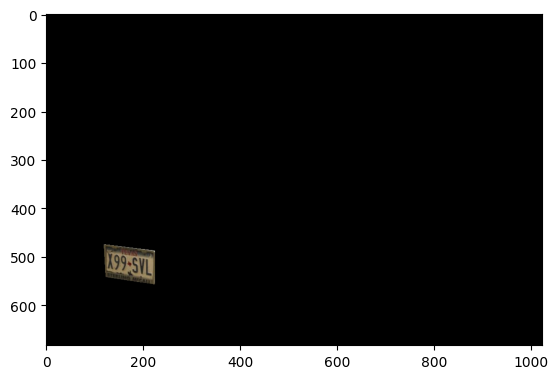

In [12]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [13]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

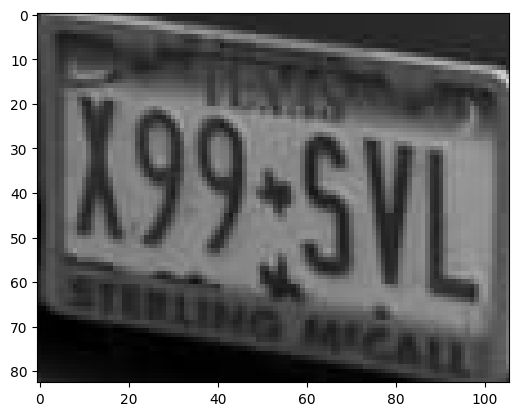

In [14]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [16]:
reader = esr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[0.9074644389061557, 7.1003079700932386],
   [110.7873211446488, 24.416676290614948],
   [101.09253556109384, 72.89969202990676],
   [-6.787321144648806, 56.58332370938505]],
  '([399 SVL',
  0.07180498775704455)]

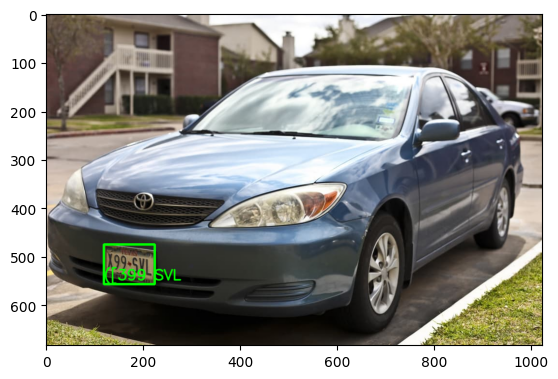

In [17]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))